# Librerias

In [1]:
import numpy as np
from keras import layers, models, regularizers
from keras.datasets import reuters

2024-09-06 18:51:30.219561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 18:51:30.230375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 18:51:30.233530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 18:51:30.241789: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preparacion de datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()

word_index = dict([(value,key) for (key,value) in word_index.items()])

for _ in train_data[0]:
    print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [4]:
train_data.shape

(8982,)

In [5]:
def vectorizar(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [7]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Red neuronal

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(46, activation='softmax'))

/home/riemannintegrable/anaconda3/envs/tfenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1725666692.198413   18875 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725666692.227735   18875 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725666692.232288   188

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/50


I0000 00:00:1725666693.872622   19578 service.cc:146] XLA service 0x798f14109ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725666693.872659   19578 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-09-06 18:51:33.897972: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-06 18:51:33.976918: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-09-06 18:51:35.483052: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_366', 2508 bytes spill stores, 2508 bytes spill loads



12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0191 - loss: 4.5628

I0000 00:00:1725666696.680082   19578 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.0516 - loss: 4.5234 - val_accuracy: 0.4930 - val_loss: 4.1343
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4984 - loss: 4.0105 - val_accuracy: 0.5020 - val_loss: 3.6134
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4887 - loss: 3.4779 - val_accuracy: 0.5080 - val_loss: 3.1412
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5111 - loss: 3.0397 - val_accuracy: 0.5320 - val_loss: 2.7927
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5365 - loss: 2.6893 - val_accuracy: 0.5470 - val_loss: 2.5327
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5530 - loss: 2.4291 - val_accuracy: 0.5630 - val_loss: 2.3479
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5667 - loss: 2.2622 - val_accuracy: 0.5700 - val_loss: 2.2209
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5801 - loss: 2.1326 - val_accuracy: 0.5850 - val_loss: 2.1149
E

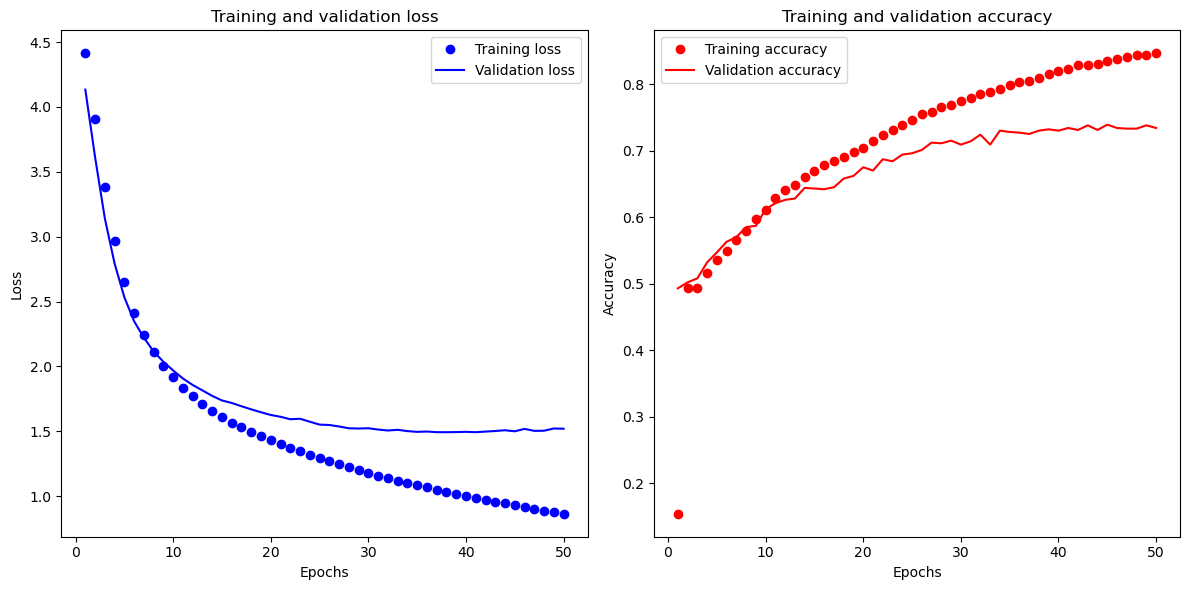

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
epochs = range(1, len(loss_values) + 1)

# Gráfica de pérdida en el primer subgráfico
ax[0].plot(epochs, loss_values, 'bo', label='Training loss')
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Gráfica de precisión en el segundo subgráfico
ax[1].plot(epochs, accuracy_values, 'ro', label='Training accuracy')
ax[1].plot(epochs, val_accuracy_values, 'r', label='Validation accuracy')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar un padding especificado
plt.show()

In [13]:
model.evaluate(X_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7114 - loss: 1.6137


[1.6355594396591187, 0.7101513743400574]

# Prediccion

In [14]:
np.argmax(model.predict(X_test)[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


4